In [2]:
from neuron import h
import numpy as np
import os.path

In [3]:
##### sec1: generate model #####

model = "../morphology/soma_axon.hoc"
model_dir = os.path.abspath(os.path.join(os.pardir, model))
change_soma_size = 0 # original soma size is used in the fig 2b, it is changed to (??): in fig (???)
change_axon_Ra = 0 # change axon Ra to generate fig (??) to (??)

In [4]:
# load model
# works only on linux
dllpath = os.path.abspath(os.path.join(os.pardir, './morphology/x86_64/.libs/libnrnmech.so'))
h.nrn_load_dll(dllpath)
h.load_file(model)
h.init_cell()

0.0

In [5]:
# morpho params

h.tstart = 0.
h.tstop = 20.
h.dt = 0.001
rm = 30000.

# morphology 
h.soma.L = 30.
h.soma.diam = 20.
h.soma.nseg = 6
h.soma.g_pas = 1./rm
h.soma.cm = 0.75

h.axon.L = 50.
h.axon.diam =1.
h.axon.nseg = 10
h.axon.g_pas = 1./rm
h.axon.cm = 0.75 * 0.75

#general
h.rm = rm
h.v_init = -70
h.ra = 150 
h.c_m = 0.75
h.xn = 1

In [6]:
# set params
# potassium
h.Ek = -80. # mV # Fig2: = 80; Fig4b:
h.gk = 1600.
h.gkm = 0.3
h.soma.gbar_kv = 1600/5.
h.axon.gbar_kv = 1600.

# sodium
h.Ena = 60.
h.gna = 8000.
h.gkm_soma = 0.3 
h.soma.gbar_na = 0.1*8000
h.axon.gbar_na = 8000.
            
# calcium (set no calcium in the model)
h.gca = 0.
h.gkca = 0.
h.gca_soma = 0.
h.gkca_soma = 0.

In [7]:
# changes soma size to generate fig(??)
if change_soma_size:
    soma_size=change_soma_size
    h.soma.L=soma_size
    h.soma.diam = soma_size

In [8]:
# change Ra to generate figure (??)
if change_axon_Ra:
    h.axon.Ra = change_axon_Ra
    h.soma.Ra = change_axon_Ra

In [16]:
# use p/n protocol (as defined in (??))

# create stimulation
st = h.SEClamp(0.5, sec = h.soma)
st.dur1 = 2. # ms
st.dur2 = 3.
st.dur3 = 15.

st.amp1= -70
st.amp2= -70 
st.amp3= -70 + 5. # v membrane + pn stimulation

h.tstop = 20 # ms
st.rs = 0.1
vec_i = h.Vector()
vec_i.record(st._ref_i) #nA;
h.run()

i_soma_pn = np.array(vec_i)

i_soma [ 0.         -0.00148613 -0.00240417 ..., -0.03389535 -0.03389528
 -0.03389521]
vm_soma [-70. -70. -70. ..., -59. -59. -59.]
vec_axonm <hoc.HocObject object at 0x7ff17ab417c8>
vec_vaxon [-70.         -70.00059664 -70.00119257 ..., -57.85912094 -57.859115
 -57.85910909]
peak -10.5498955037
peak place 829


/home/maja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:66: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/maja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:70: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NameError: name 'clear_cell' is not defined

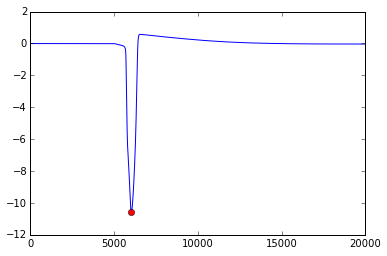

In [20]:
# calculate I-V

volt = -59 # voltage clamp
# create stimulation
v_value = volt # v_value = measured volt; we could also loope trough volts

##### here call the function for calculating I-V point for given V and given model
st = h.SEClamp(0.5, sec = h.soma)
st.dur1 = 2. # ms
st.dur2 = 3.
st.dur3 = 15.

st.amp1= -70
st.amp2= -70 
p_v_value = i_soma_pn*((v_value-(-70))/5.) 
st.amp3= v_value

st.rs = 0.1 # for ideal clamp set to 0.001

# record params
vec_i = h.Vector()
vec_i.record(st._ref_i) #nA;
        
#vec_vm = h.Vector()  
#vec_vm.record(st._ref_vc) 

# in addition record m in the end of the axon (Sodium opening variable)        
#vec_axonm = h.Vector()
#vec_axonm0 = h.Vector()
#vec_vaxon = h.Vector()

vect_axons = []
vect_ms = []
vect_m = []

hallermann = False
if hallermann:
    vec_vaxon.record(h.axon[0](0.99)._ref_v)
    #import pdb; pdb.set_trace()
    #vec_axonm.record(h.axon[0](0.99)._ref_ina) # <- m is not in hallermann, what is?
    vec_axonm.record(h.axon[0](0.99)._ref_o_nax)
    vec_axonm0.record(h.axon[0](0.99)._ref_o_na)
else:
    try:
        vec_axonm.record(h.axon(0.99)._ref_m_na)
        vec_vaxon.record(h.axon(0.99)._ref_v)
    except:
        vec_axonm.record(h.iseg(0.99)._ref_m_na)
        vec_vaxon.record(h.iseg(0.99)._ref_v)
        
h.run()

i_soma = np.array(vec_i) - p_v_value
#vm_soma = np.array(vec_vm) 
#list_i.append(np.array(i_soma))
#list_vm.append(np.array(vm_soma))
#list_axonm.append(np.array(vec_axonm))
#list_vaxon.append(np.array(vec_vaxon))

# calculate minimum peak from find_peak[0] to find_peak[1]

peak = min(i_soma[(st.dur1+st.dur2+0.2)/h.dt:(st.dur1+st.dur2+3.0)/h.dt])
print 'peak', peak
#peaks.append(peak)

peak_place = np.argmin(i_soma[(st.dur1+st.dur2+0.2)/h.dt:(st.dur1+st.dur2+3.0)/h.dt])
print 'peak place', peak_place

import matplotlib.pylab as plt
%matplotlib inline
plt.plot(i_soma)
plt.plot((st.dur1+st.dur2+0.2)/h.dt+peak_place, peak, 'ro')

#peak_places.append(peak_place)
clear_cell() 

#current = np.array(list_i)
#voltage = np.array(list_vm)
#axon_m = np.array(list_axonm)
#axon_v = np.array(list_vaxon)

time_dt = h.dt  
#peaks = np.array(peaks)

#return peaks, volts, current, voltage, time_dt, axon_m, axon_v, peak_places

In [ ]:


i_soma = np.array(vec_i) - p_v_value
vm_soma = np.array(vec_vm) 
list_i.append(np.array(i_soma))
list_vm.append(np.array(vm_soma))
list_axonm.append(np.array(vec_axonm))
list_vaxon.append(np.array(vec_vaxon))
#import pdb; pdb.set_trace()
# calculate minimum peak from find_peak[0] to find_peak[1]

peak = min(i_soma[(st.dur1+st.dur2+params_analysis.find_peak[0])/h.dt:(st.dur1+st.dur2+params_analysis.find_peak[1])/h.dt])
peaks.append(peak)

peak_place = np.argmin(i_soma[(st.dur1+st.dur2+params_analysis.find_peak[0])/h.dt:(st.dur1+st.dur2+params_analysis.find_peak[1])/h.dt])
peak_places.append(peak_place)
clear_cell() 

current = np.array(list_i)
voltage = np.array(list_vm)
axon_m = np.array(list_axonm)
axon_v = np.array(list_vaxon)

time_dt = h.dt  
peaks = np.array(peaks)

In [ ]:
# plot the figure
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(i_soma)